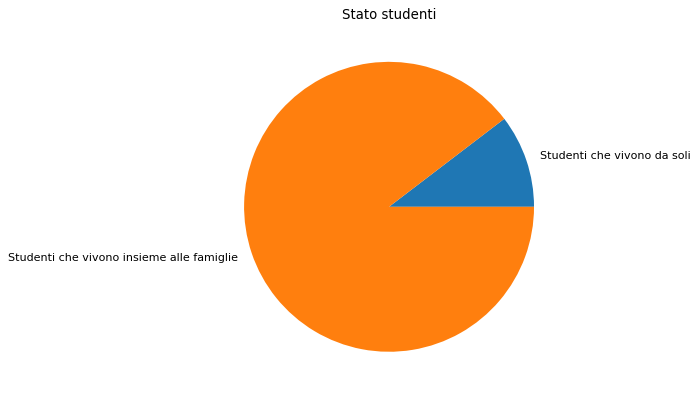

<ipython-input-10-7af9b2767afc>:16: RuntimeWarning: overflow encountered in power
  squaredErrors = np.power((h-y), 2)
C:\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


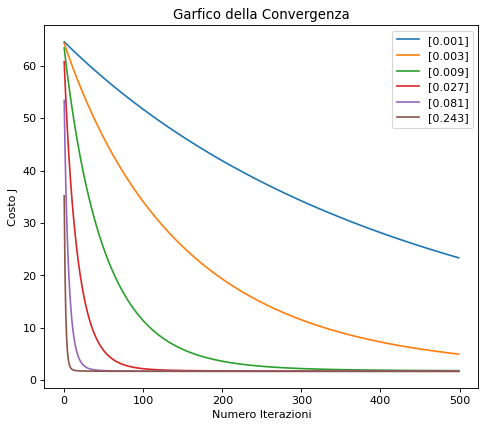

Alpha Ottimale: [0.243]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#define Function
def testConvergence(values):
    dim = np.max(np.shape(values))
    for i in range (2, dim):
        if(values[i] >= values[i-1]):
            return 0
    return 1

def costFunction(X, y, theta):                             
    m = np.size(y)                                         
    h = X.dot(theta)                                               
    squaredErrors = np.power((h-y), 2)                                      
    J = (1 / (2 * m)) * squaredErrors.sum(axis = 0)        
    return J

def featureNormalize(X):
    X_Norm = X.astype(float)                                     
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)                                        
    columns = np.shape(X)[1]
    for i in range(0,columns):
        X_Norm[:,i] = (X[:,i] - mu[i]) / (sigma[i])              
    return X_Norm, mu, sigma

def gradientDescent(X, y, theta, alpha, lamb, num_iters):
    m = np.size(y)
    J_history = np.zeros([num_iters, 1])
    theta_history = np.zeros([num_iters, np.shape(theta)[0]])
    for iter in range (num_iters):
        h = X.dot(theta);                                                        
        theta = (theta*(1-alpha*(lamb/m))) - (alpha/m)*np.transpose(X).dot(h - y)
        J_history[iter] = costFunction(X, y, theta)                 
        theta_history[iter, :] = theta[0]
    return theta, J_history, theta_history

#import Data
data= np.asmatrix(pd.read_csv("student-mat.csv"))            

num_columns = np.shape(data)[1]
X = np.array(data[:, 0:(num_columns-1)])
y = np.array(data[:, (num_columns-1)])                        

#plotting
column_status = np.array(data[:, 5])
#print(column_status)
countT = 0;
countA = 0;
for i in range (len(column_status)):
    if column_status[i] == 0:
        countA += 1
    else:
        countT += 1
plt.figure(1, figsize=(7,6), dpi=80);
plt.pie([countA, countT], labels = ["Studenti che vivono da soli", "Studenti che vivono insieme alle famiglie"])
plt.title("Stato studenti")
plt.show()

#features generation
x1_new = np.array(X[:, 6]) + np.array(X[:, 7])                           
x2_new = np.array(X[:, 8]) + np.array(X[:, 9])                           
X = np.c_[X, x1_new, x2_new]                                             
[m,n] = np.shape(X)

#features normalizing
X, mu, sigma = featureNormalize(X)                                    
X = np.c_[np.ones([m,1]), X]                                             
[m,n] = np.shape(X)

#learning parameters
alpha = 0.01
lamb= 10
itera = 500
theta_init = np.zeros((n,1))
theta, J_hystory, theta_history = gradientDescent(X,y,theta_init,alpha,lamb,itera)

#automatic selection alpha
different_alpha = 10
alpha_possible = np.zeros((different_alpha,1))
alpha_possible[0] = 0.001

for i in range(1, different_alpha):
    alpha_possible[i] = alpha_possible[i-1]*3
    
cost_function_alpha = np.zeros((itera,different_alpha))
convergenceTest = np.zeros((different_alpha,1))

for i in range(0, different_alpha):
    theta_inner = np.zeros((n,1))
    alpha_val = alpha_possible[i]
    theta_inner, J_hystory, theta_history = gradientDescent(X,y,theta_inner,alpha_val,lamb,itera)
    cost_function_alpha[:, i] = np.array(J_hystory).T
    convergenceTest[i] = testConvergence(cost_function_alpha[:, i])

#plot graph
plt.figure(2, figsize=(7,6), dpi=80)
plt.title("Garfico della Convergenza")
plt.xlabel('Numero Iterazioni')
plt.ylabel('Costo J')
iteration_vector = np.arange(0, itera)
for i in range (0, different_alpha):
    if (convergenceTest[i] == 1):      
        plt.plot(iteration_vector, cost_function_alpha[:,i], label=alpha_possible[i])
        plt.legend()
plt.show()
alpha_convergence = convergenceTest*alpha_possible
alpha_convergence = alpha_convergence[alpha_convergence != 0].reshape(-1,1)                
alpha = alpha_convergence[-1]
print('Alpha Ottimale:', alpha)

#execute learning
theta, J_hystory,theta_history = gradientDescent(X,y,theta_init,alpha,lamb,itera)

#predictions                                                

# Consider first 10 examples
PREDICT_X = X[0:10,:];
predict = np.round(PREDICT_X.dot(theta))
error = predict - y[0:10]
absErr = abs(error)